In [1]:
'''Importing Packages'''
import pandas as pd
import numpy as np
from pandas_profiling import report
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import missingno as mno

In [2]:
'''Loading train and test Datasets '''
train = pd.read_csv('./train_ctrUa4K.csv')
test = pd.read_csv('./test_lAUu6dG.csv')
# train.shape, test.shape
'''Changing the loan amount term from months to years for simplification'''
train['Loan_Amount_Term'] = train['Loan_Amount_Term']/12
test['Loan_Amount_Term'] = test['Loan_Amount_Term']/12

In [3]:
'''Creating a copy of dataset'''
df_train = train.copy()
df_test = test.copy()

In [4]:
df_train['Loan_Status'] = df_train['Loan_Status'].map({'N':0, 'Y':1})

In [5]:
x = df_train.drop(columns=['Loan_Status'], axis=1)
y_train = df_train['Loan_Status']

In [14]:
x.shape, df_test.shape

((614, 12), (367, 12))

In [12]:
combinde = pd.concat([x, df_test])

In [13]:
combinde

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,30.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,30.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,30.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,30.0,1.0,Rural


In [15]:
combinde.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [16]:
'''Feature Selection, Feature Engineering and, Missing Value Treatment'''

'Feature Selection, Feature Engineering and, Missing Value Treatment'

In [17]:
dependent_max = combinde.Dependents.value_counts().index[0]
combinde.Dependents = combinde.Dependents.fillna(dependent_max)

In [18]:
gender_max = combinde.Gender.value_counts().index[0]
combinde.Gender = combinde.Gender.fillna(gender_max)

In [19]:
married_max = combinde.Married.value_counts().index[0]
combinde.Married = combinde.Married.fillna(married_max)

In [21]:
combinde.LoanAmount = combinde.LoanAmount.fillna(combinde.LoanAmount.median())

In [22]:
combinde.Loan_Amount_Term = combinde.Loan_Amount_Term.fillna(combinde.Loan_Amount_Term.median())

In [23]:
combinde['Self_Employed'] = combinde['Self_Employed'].map({'No':0, 'Yes':1})

In [24]:
combinde.Self_Employed = combinde.Self_Employed.fillna(combinde.Self_Employed.median())

In [25]:
combinde.Credit_History = combinde.Credit_History.fillna(combinde.Credit_History.median())

In [27]:
combinde['Total_Income'] = combinde['ApplicantIncome'] + combinde['CoapplicantIncome']
combinde['debt_income_ratio'] = combinde['LoanAmount']/combinde['Total_Income']

In [28]:
combinde.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
debt_income_ratio    0
dtype: int64

In [29]:
combinde.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,debt_income_ratio
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,128.0,30.0,1.0,Urban,5849.0,0.021884
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.0,30.0,1.0,Rural,6091.0,0.021015
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.0,30.0,1.0,Urban,3000.0,0.022000
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.0,30.0,1.0,Urban,4941.0,0.024287
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.0,30.0,1.0,Urban,6000.0,0.023500


In [30]:
'''Dummyficiation of Features'''

def get_features_test(table):
    
    table['Gender'] = table['Gender'].map({"Male": 0, "Female": 1})
    table['Married'] = table['Married'].map({"No": 0, "Yes": 1})
    graduate_dummies = pd.get_dummies(table.Education, prefix = 'Education')
    dependent_dummies = pd.get_dummies(table.Dependents, prefix="Dependents")
    property_dummies = pd.get_dummies(table.Property_Area, prefix="Property_Area")
    
    table_dummies = pd.concat([table, dependent_dummies, property_dummies, graduate_dummies], axis=1)
    
    # drop categorical fields
    table_dummies.drop(['Loan_ID','Dependents', 'Education', 'Property_Area'], axis=1, inplace=True)
    return table_dummies

In [31]:
comb = get_features_test(combinde)

In [32]:
comb

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,debt_income_ratio,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate
0,0,0,0.0,5849,0.0,128.0,30.0,1.0,5849.0,0.021884,1,0,0,0,0,0,1,1,0
1,0,1,0.0,4583,1508.0,128.0,30.0,1.0,6091.0,0.021015,0,1,0,0,1,0,0,1,0
2,0,1,1.0,3000,0.0,66.0,30.0,1.0,3000.0,0.022000,1,0,0,0,0,0,1,1,0
3,0,1,0.0,2583,2358.0,120.0,30.0,1.0,4941.0,0.024287,1,0,0,0,0,0,1,0,1
4,0,0,0.0,6000,0.0,141.0,30.0,1.0,6000.0,0.023500,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,1.0,4009,1777.0,113.0,30.0,1.0,5786.0,0.019530,0,0,0,1,0,0,1,0,1
363,0,1,0.0,4158,709.0,115.0,30.0,1.0,4867.0,0.023629,1,0,0,0,0,0,1,1,0
364,0,0,0.0,3250,1993.0,126.0,30.0,1.0,5243.0,0.024032,1,0,0,0,0,1,0,1,0
365,0,1,0.0,5000,2393.0,158.0,30.0,1.0,7393.0,0.021372,1,0,0,0,1,0,0,1,0


In [41]:
x_train = comb[:614]
x_test = comb[614:]

In [44]:
x_train.shape, x_test.shape, y_train.shape

((614, 19), (367, 19), (614,))

In [43]:
'''Importing Machine Learning Packages'''
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from skopt import gp_minimize
from skopt.space import Real, Integer
from functools import partial

/home/pranit/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
'''Creating Train and Validation Dataset'''
train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [46]:
def model(X,Y,x,y):

#     Logistinc Regression
    log = LogisticRegression(random_state=0)
    log.fit(X,Y)
    log.predict(x)
    
#     Decision Tree
    des_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    des_tree.fit(X,Y)
    des_tree.predict(x)
    
#     Knearestneighbour
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p =2)
    knn.fit(X,Y)
    knn.predict(x)
    
#     Random Forrest Model
    forrest = RandomForestClassifier(random_state=0)
    forrest.fit(X,Y)
    forrest.predict(x)
    
# Using SVC method of svm class to use Support Vector Machine Algorithm
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X, Y)
    svc_lin.predict(x)

#Using SVC method of svm class to use Kernel SVM Algorithm
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X, Y)
    svc_rbf.predict(x)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    gauss = GaussianNB()
    gauss.fit(X, Y)
    gauss.predict(x)
    
#     XGBoost Classifier
    xg = XGBClassifier()
    xg.fit(X,Y)
    xg.predict(x)
    
    print('Logistic Regression Training Accuracy {}, Validation Accuracy {}:'.format(log.score(X, Y), log.score(x,y)))
    print('K Nearest Neighbor Training Accuracy {}: Validation Accuracy {}'.format(knn.score(X, Y), knn.score(x,y)))
    print('Support Vector Machine (Linear Classifier) Training Accuracy {}: Validation Accuracy {}'.format(svc_lin.score(X, Y), svc_lin.score(x,y)))
    print('Support Vector Machine (RBF Classifier) Training Accuracy {}: Validation Accuracy {}'.format(svc_rbf.score(X, Y),svc_rbf.score(x,y) ))
    print('Gaussian Naive Bayes Training Accuracy {}: Validation Accuracy {}'.format(gauss.score(X, Y), gauss.score(x,y)))
    print('Decision Tree Classifier Training Accuracy {}: Validation Accuracy {}'.format(des_tree.score(X, Y),des_tree.score(x,y) ))
    print('Random Forest Classifier Training Accuracy {}: Validation Accuracy {}'.format(forrest.score(X, Y), forrest.score(x,y)))  
    print('XGBoost Classifier Training Accuracy {}: Validation Accuracy {}'.format(xg.score(X, Y), xg.score(x,y)))
    
    return log, des_tree, knn, forrest, svc_lin, svc_rbf, gauss, xg

In [47]:
models = model(train_x, train_y, test_x, test_y)

/home/pranit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Training Accuracy 0.8085539714867617, Validation Accuracy 0.8292682926829268:
K Nearest Neighbor Training Accuracy 0.7413441955193483: Validation Accuracy 0.6341463414634146
Support Vector Machine (Linear Classifier) Training Accuracy 0.7820773930753564: Validation Accuracy 0.8292682926829268
Support Vector Machine (RBF Classifier) Training Accuracy 0.6802443991853361: Validation Accuracy 0.7398373983739838
Gaussian Naive Bayes Training Accuracy 0.7963340122199593: Validation Accuracy 0.8292682926829268
Decision Tree Classifier Training Accuracy 1.0: Validation Accuracy 0.7560975609756098
Random Forest Classifier Training Accuracy 1.0: Validation Accuracy 0.8130081300813008
XGBoost Classifier Training Accuracy 1.0: Validation Accuracy 0.8048780487804879


In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
# Instantiate the classfiers and make a list
classifiers = [KNeighborsClassifier(n_neighbors=5, metric='minkowski', p =2), 
               DecisionTreeClassifier(criterion='entropy',random_state=0), 
               RandomForestClassifier(random_state=0), 
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(train_x, train_y)
    yproba = model.predict_proba(test_x)[::,1]
    
    fpr, tpr, _ = roc_curve(test_y,  yproba)
    auc = roc_auc_score(test_y, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

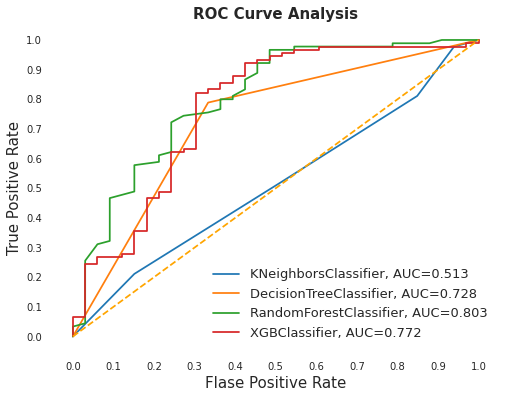

In [50]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [51]:
rand_for = models[3]

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rand_for, train_x, train_y, cv=10, scoring = "accuracy")
print('Scores:', scores)
print(scores.mean(), scores.std())

Scores: [0.78       0.79591837 0.79591837 0.7755102  0.83673469 0.7755102
 0.69387755 0.7755102  0.83673469 0.81632653]
0.7882040816326531 0.038818214937218855


In [53]:
'''Important Feature selection to tune the model'''

importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(rand_for.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.reset_index()

,feature,importance
0,Credit_History,0.250
1,debt_income_ratio,0.128
2,Total_Income,0.127
3,ApplicantIncome,0.118
4,LoanAmount,0.103
5,CoapplicantIncome,0.078
6,Loan_Amount_Term,0.027
7,Married,0.020
8,Dependents_0,0.017
9,Property_Area_Semiurban,0.017


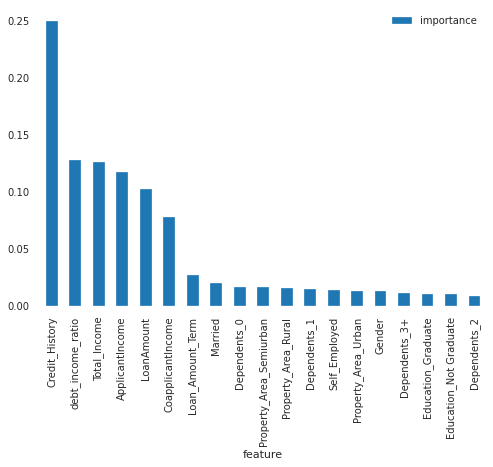

In [54]:
importances.plot.bar()

In [55]:
'''Dropping less importatn features'''

'Dropping less importatn features'

In [56]:
x_train.columns

Index(['Gender', 'Married', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Total_Income', 'debt_income_ratio', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Education_Graduate',
       'Education_Not Graduate'],
      dtype='object')

In [57]:
def drop_feature(df):
    df.drop(['Dependents_2', 'Education_Not Graduate', 'Education_Graduate', 'Dependents_3+'], 
            axis = 1, inplace = True)
    return df

In [60]:
x_train = drop_feature(x_train)

/home/pranit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
x_test = drop_feature(x_test)

/home/pranit/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [65]:
'''Training and Testing random forrest model on new data set with reduced features'''
# Random Forrest new model on reduced number of variables
rand = RandomForestClassifier(random_state=0)
rand.fit(train_x, train_y)
print("Training Accuracy:",round(rand.score(train_x, train_y)*100,2))
print("Validation Accuracy:",round(rand.score(test_x, test_y)*100,2))

Training Accuracy: 100.0
Validation Accuracy: 82.93


In [66]:
scores = cross_val_score(rand, train_x, train_y, cv=10, scoring = "accuracy")
print('Scores:', scores)
print(scores.mean(), scores.std())

Scores: [0.8        0.81632653 0.79591837 0.73469388 0.83673469 0.81632653
 0.69387755 0.79591837 0.83673469 0.79591837]
0.7922448979591837 0.0426701459778098


In [67]:
'''Random Forrest Hyperparemeter tuning '''

param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

In [68]:
clf.fit(train_x, train_y)
print('Training accuracy',clf.score(train_x, train_y))
print('Testing Accuracy', clf.score(test_x, test_y))

Training accuracy 0.8370672097759674
Testing Accuracy 0.8373983739837398


In [69]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 100}

In [70]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 16,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(train_x, train_y)
random_forest.predict(test_x)
print(random_forest.score(train_x, train_y)*100)
print(random_forest.score(test_x, test_y)*100)

83.70672097759673
83.73983739837398


In [71]:
predictions = random_forest.predict(x_test)

In [72]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [73]:
from datetime import date
today = date.today()
today

datetime.date(2020, 5, 30)

In [75]:
def save_data(preds):
    d = pd.DataFrame()
    aux = pd.read_csv('./test_lAUu6dG.csv')
    d['Loan_ID'] = aux['Loan_ID']
    d['Loan_Status'] = preds
    d['Loan_Status'].replace({1:'Y', 0:'N'}, inplace = True)
    d.to_csv(f'./loan_prediction_submission2_{today}.csv', index = False)
    return d

In [76]:
df = save_data(predictions)

In [77]:
df.groupby(['Loan_Status']).Loan_ID.count().reset_index()

,Loan_Status,Loan_ID
0,N,65
1,Y,302


In [78]:
x_test

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,debt_income_ratio,Dependents_0,Dependents_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0.0,5720,0.0,110.0,30.0,1.0,5720.0,0.019231,1,0,0,0,1
1,0,1,0.0,3076,1500.0,126.0,30.0,1.0,4576.0,0.027535,0,1,0,0,1
2,0,1,0.0,5000,1800.0,208.0,30.0,1.0,6800.0,0.030588,0,0,0,0,1
3,0,1,0.0,2340,2546.0,100.0,30.0,1.0,4886.0,0.020467,0,0,0,0,1
4,0,0,0.0,3276,0.0,78.0,30.0,1.0,3276.0,0.023810,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,1.0,4009,1777.0,113.0,30.0,1.0,5786.0,0.019530,0,0,0,0,1
363,0,1,0.0,4158,709.0,115.0,30.0,1.0,4867.0,0.023629,1,0,0,0,1
364,0,0,0.0,3250,1993.0,126.0,30.0,1.0,5243.0,0.024032,1,0,0,1,0
365,0,1,0.0,5000,2393.0,158.0,30.0,1.0,7393.0,0.021372,1,0,1,0,0
